In [1]:
import os
import nibabel as nb
import numpy as np
from nilearn import datasets, image, plotting
from functions import clean_func_image, edit_events_musicnoise_stability, extract_features_for_stab, estimate_stability

In [2]:
data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
fmriprep_dir = os.path.join(data_root, 'derivatives','fmriprep23')
output_func_dir = os.path.join(data_root, 'derivatives', 'mvpa_04_musicnoise_bold', 'func_clean')
output_feat_stab_dir = os.path.join(data_root, 'derivatives', 'mvpa_08_stability_musicnoise_bold', 'feat_stab')
output_stab_dir = os.path.join(data_root, 'derivatives', 'mvpa_08_stability_musicnoise_bold', 'stab')

In [3]:
subject_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17']

# Fetch brain mask

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



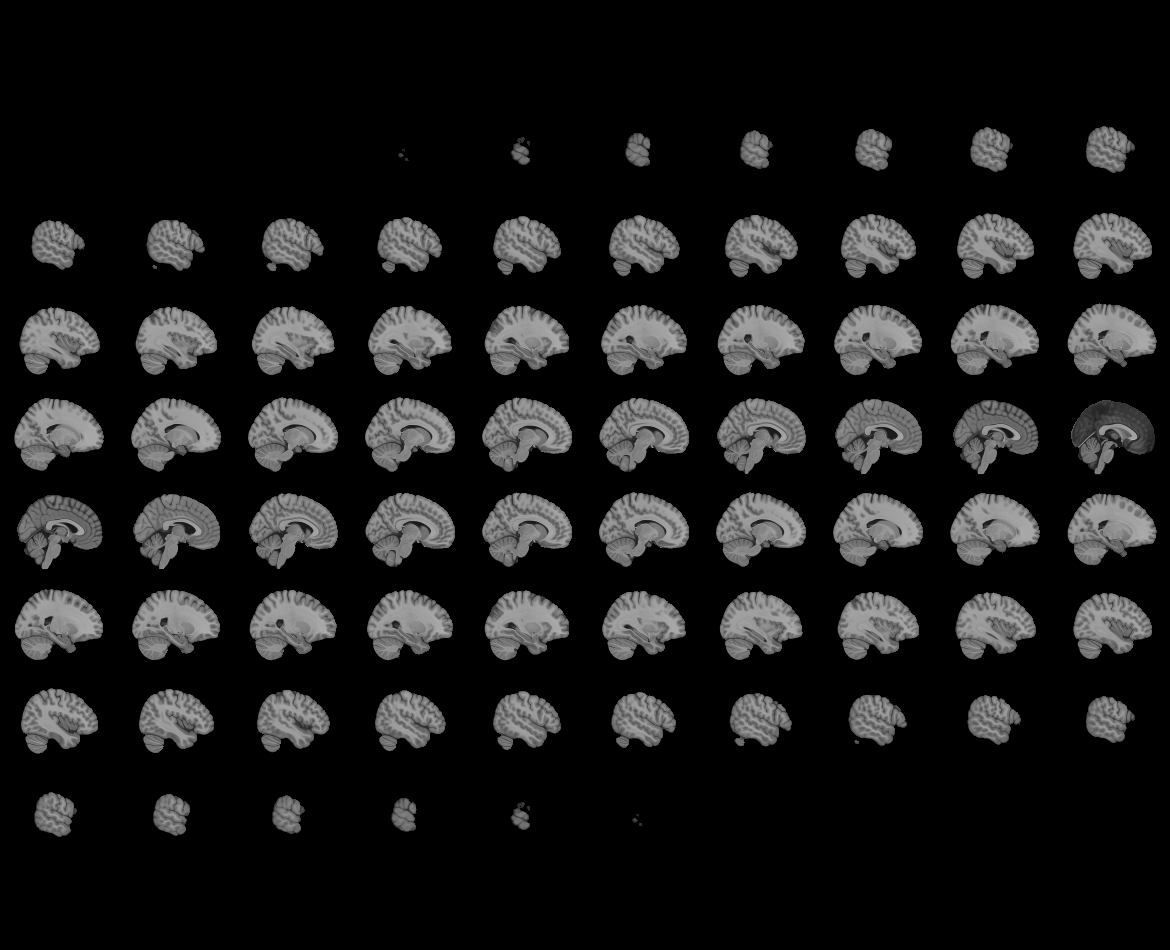
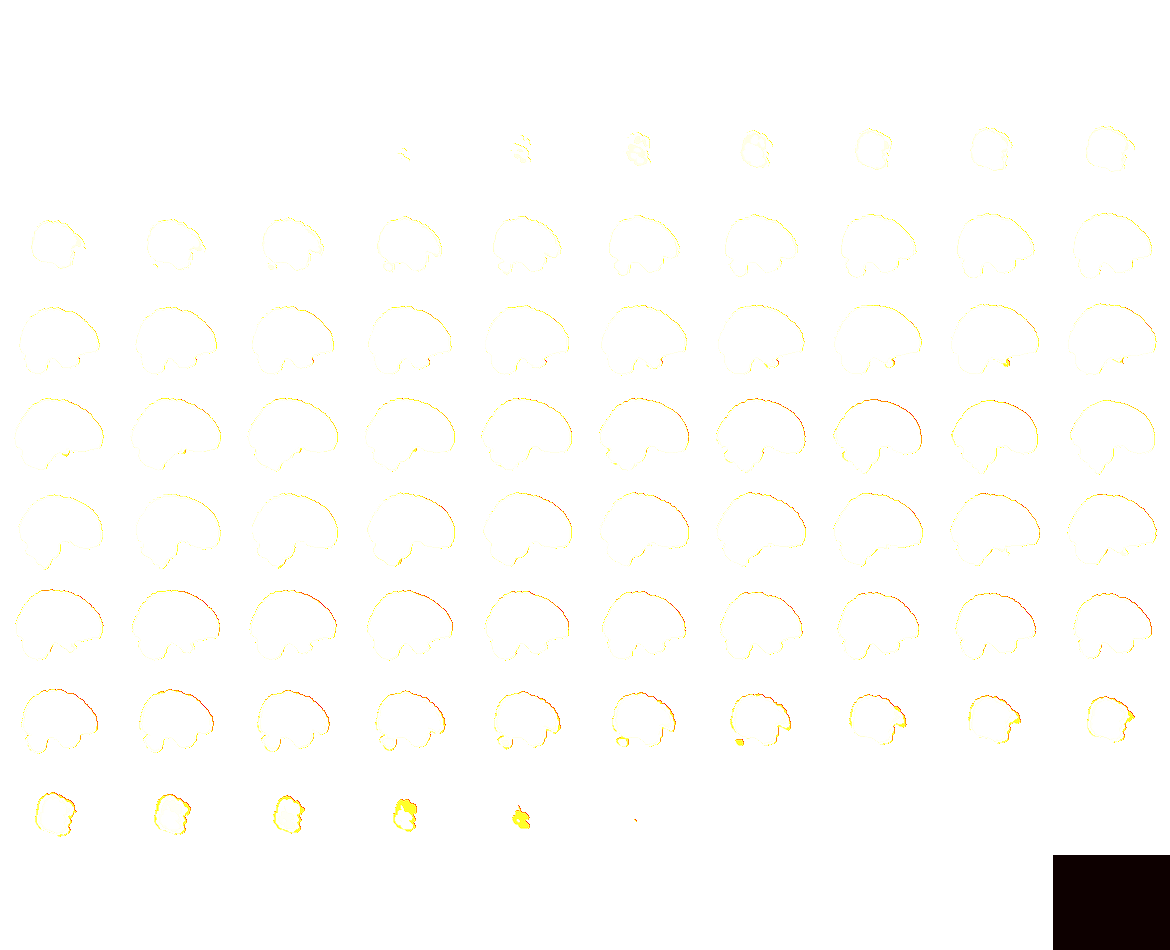

In [4]:
mni_brain_file = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/derivatives/mni_icbm152_t1_tal_nlin_asym_09c_mask.nii'
example_func_file = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/derivatives/fmriprep23/sub-01/ses-01/func/sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'

example_func = nb.load(example_func_file)

mni_mask = nb.load(mni_brain_file)

mni_resampled = image.resample_img(
    mni_mask, target_affine=example_func.affine, target_shape=example_func.shape[0:3], interpolation="nearest")

plotting.view_img(mni_resampled)

## Clean and extract features

In [5]:
for subject in subject_list:
    for run in ['1','2','3','4']:
        img_clean = clean_func_image(fmriprep_dir, output_func_dir, mni_resampled, subject, run, overwrite=True)
        events_split = edit_events_musicnoise_stability(data_root, subject, run)
        extract_features_for_stab(img_clean, events_split, output_feat_stab_dir, subject, run)

Cleaning functional image for subject 01, run 1...
Saving cleaned image for subject 01, run 1...
Functional image cleaned for subject 01, run 1.
Editing events for subject 01, run 1...
Events edited for subject 01, run 1.
Extracting features for sub 01 run 1...
Done exporting features for subject 01 run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



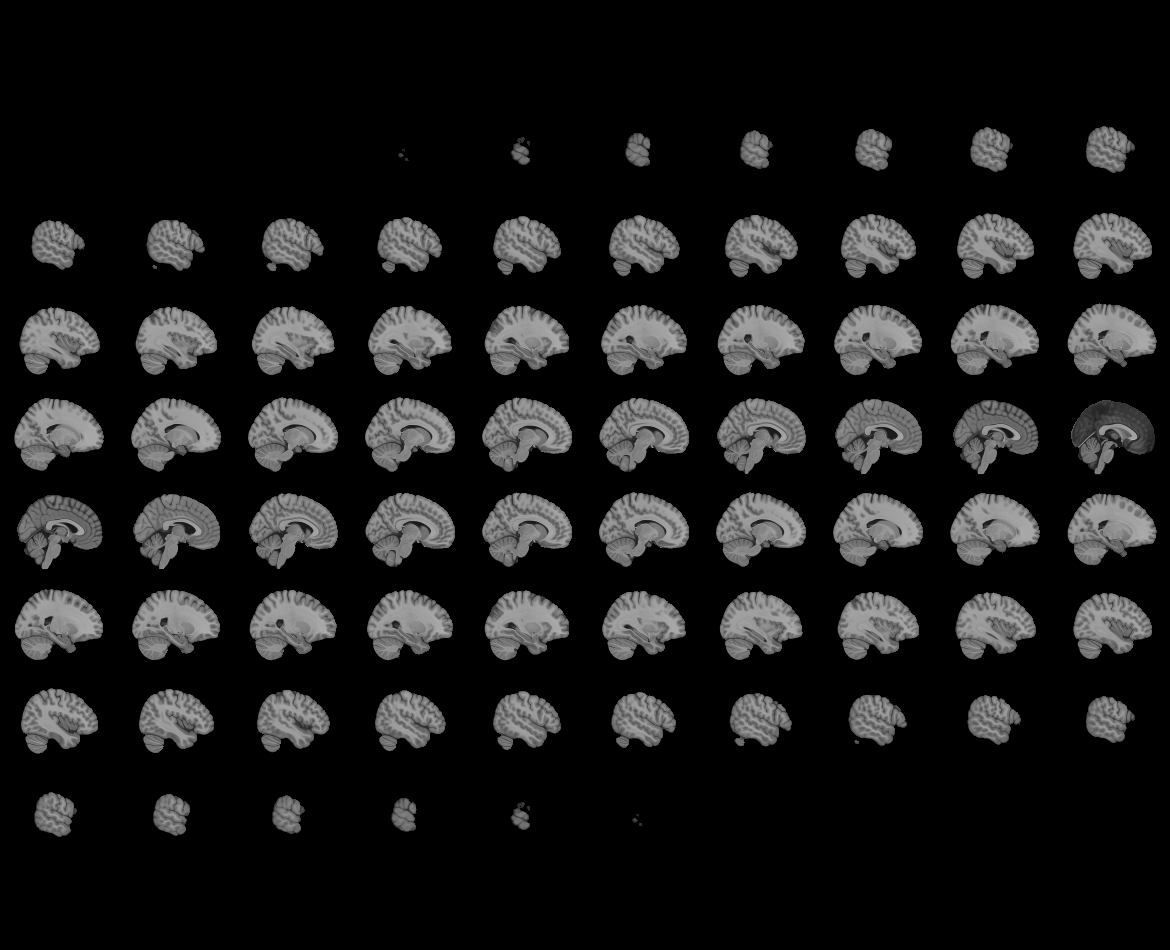
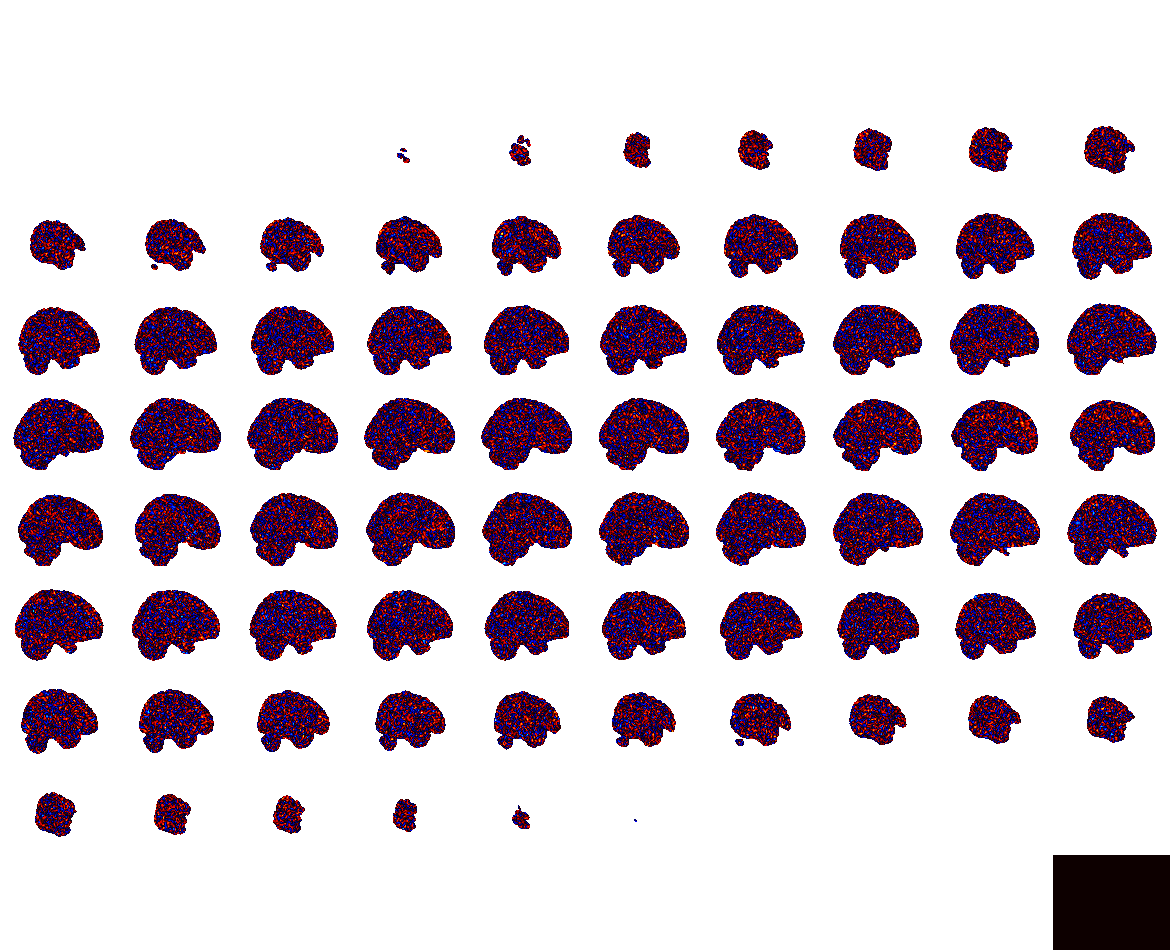

In [7]:
from nilearn import plotting
func_img = nb.load('/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_04_musicnoise_bold/func_clean/sub-01_ses-01_task-02a_run-1_cleaned.nii.gz')
plotting.view_img(func_img.slicer[...,0])

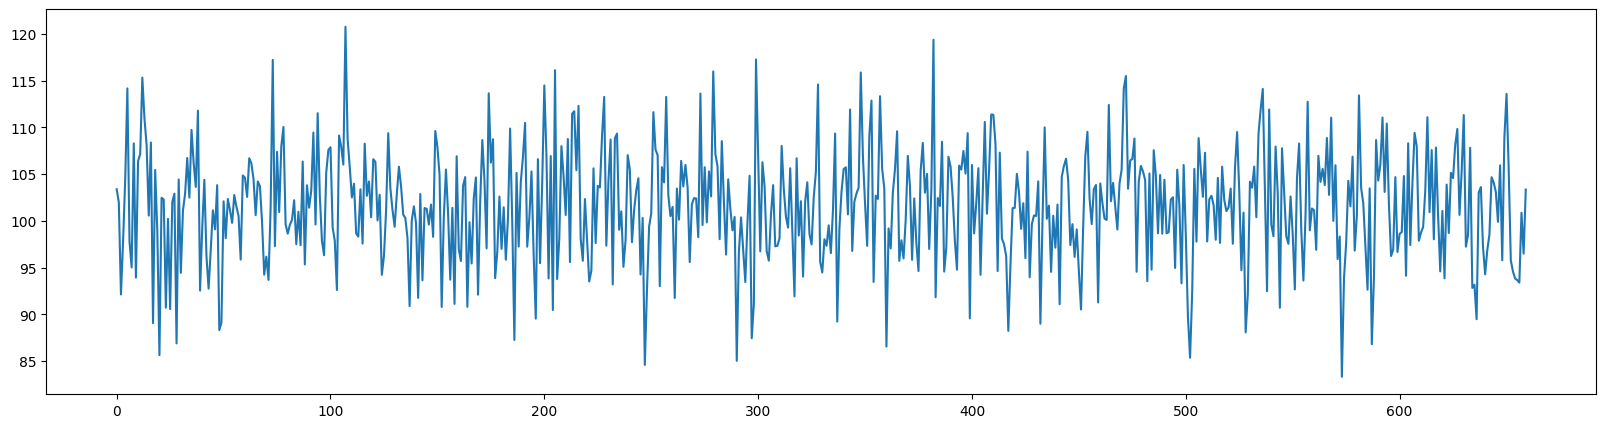

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(func_img.get_fdata()[30,20,30,:])

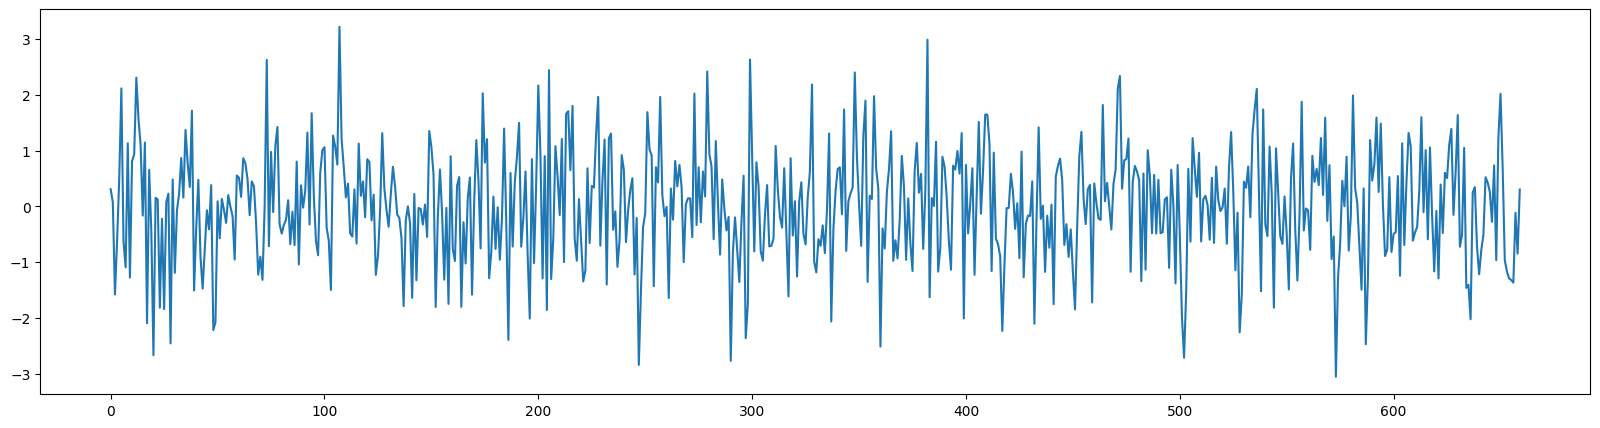

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(func_img.get_fdata()[30,20,30,:])

In [5]:
estimate_stability(output_feat_stab_dir, output_stab_dir, '02')

Estimating stability for subject 02...
2556
X coordinate 0/97...


KeyboardInterrupt: 

In [4]:
from concurrent.futures import ThreadPoolExecutor

# Wrapper function to pass multiple arguments
def wrapper(subject):
    return estimate_stability(output_feat_stab_dir, output_stab_dir, subject)

with ThreadPoolExecutor(max_workers=2) as executor:
    results = list(executor.map(wrapper, subject_list))


Estimating stability for subject 01...Estimating stability for subject 02...

X coordinate 0/97...
X coordinate 0/97...
